# Intro to LocalGP

The LocalGP family of fields mapped using locally stationary Gaussian processes (defined over space and time) with data-driven decorrelation scales are available through Argovis' grids API. In this notebook we illustrate some basic data selection and usage of these products.

> This notebook assumes you have already familiarized yourself with basic Argovis API usage and the grids API. If you're unsure, then start with [this general intro notebook](https://github.com/argovis/demo_notebooks/blob/main/Intro_to_Argovis.ipynb) and this [grids intro notebook](https://github.com/argovis/demo_notebooks/blob/main/dataset_specific_notebooks/Grid_Intro.ipynb) before coming back to LocalGP.

## Setup

In addition to importing a few python packages, make sure to plug in your Argovis API key for `API_KEY` in the next cell. If you don't have a free Argovis API key yet, get one at https://argovis-keygen.colorado.edu/.

In [26]:
import requests, xarray, pandas, math, datetime, copy
import numpy as np
from datetime import datetime, timedelta
from argovisHelpers import helpers as avh
import helpers

API_KEY=''
API_PREFIX = 'https://argovis-api.colorado.edu/'

## Selecting data

LocalGP datasets available for consumption are listed at [https://argovis.colorado.edu/localgp](https://argovis.colorado.edu/localgp). Let's download some potential temperature integral data for a small region, anticipating that we are going to want to calculate an area weighted timeseries. We proceed like any gridded product in Argovis, using the `localGPintegrals` grid for values integrated over depth ranges; at the time of writing, there is only one level available for this grid, the integral from 15 to 50 decibar as studied in [https://os.copernicus.org/articles/21/2463/2025/](https://os.copernicus.org/articles/21/2463/2025/); level selection will be illustrated in this notebook when additional levels become available, and this dataset can be explored interactively from [our frontend](https://argovis.colorado.edu/grids?lattice=localGPintegral&grid=potential_temperature).

In [27]:
qsp = {
    'data':'potential_temperature',
    'polygon': [[-151,39],[-151,50],[-135,50],[-135,39],[-151,39]]
}

potential_temperature_grid = avh.query('grids/localGPintegral', options=qsp, apikey=API_KEY, apiroot=API_PREFIX, verbose=True)

https://argovis-api.colorado.edu/grids/localGPintegral?data=potential_temperature&polygon=[[-151,+39],+[-151,+50],+[-135,+50],+[-135,+39],+[-151,+39]]


Let's transform this into an xarray using our helpers:

In [28]:
df = helpers.level_df(potential_temperature_grid, 
                      ['potential_temperature', 'longitude', 'latitude', 'timestamp'], 
                      ['15_50'], 
                      index=["latitude","longitude","timestamp","pressure"]
                     )
ds = df.to_xarray()

In [29]:
ds

<xarray.Dataset>
Dimensions:                (latitude: 11, longitude: 16, timestamp: 228,
                            pressure: 1)
Coordinates:
  * latitude               (latitude) float64 39.5 40.5 41.5 ... 47.5 48.5 49.5
  * longitude              (longitude) float64 -150.5 -149.5 ... -136.5 -135.5
  * timestamp              (timestamp) datetime64[ns] 2004-01-15 ... 2022-12-15
  * pressure               (pressure) object '15_50'
Data variables:
    potential_temperature  (latitude, longitude, timestamp, pressure) float64 ...

We have the usual xarray `Dataset` that we've seen before.

## Computing area-weighted timeseries

Now that we have a `Dataset` representing LocalGP data in our region of interest, we can carry on to compute area weighted means as a function of timestep:

In [30]:
ds_aw = helpers.regional_mean(ds)

In [31]:
ds_aw

<xarray.Dataset>
Dimensions:                (timestamp: 228, pressure: 1)
Coordinates:
  * timestamp              (timestamp) datetime64[ns] 2004-01-15 ... 2022-12-15
  * pressure               (pressure) object '15_50'
Data variables:
    potential_temperature  (timestamp, pressure) float64 329.3 315.4 ... 418.1

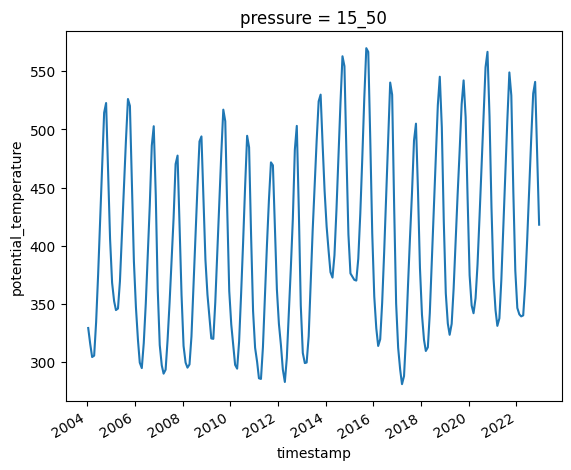

In [32]:
ds_aw['potential_temperature'].plot()